In [5]:
import time
import imutils
import cv2
import torch
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import base64
from io import BytesIO
import os
from tensorflow import keras
import yaml
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

import os
import base64
from io import BytesIO
from PIL import Image
import numpy as np
from mimetypes import guess_extension, guess_type
import matplotlib.pyplot as plt

2022-06-13 17:25:58.500793: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.9/site-packages/cv2/../../lib64:
2022-06-13 17:25:58.500859: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [1]:
weight_vietocr_path = '/data_science/data_science/data/v1/idcard/pretrained_ocr/transformerocr.pth'
#weight_vietocr_path = "/data_science/data_science/data/v1/final_models/id_card/seq2seq_ocr.pth"
config_model_vietocr_path = "/data_science/data_science/data/v1/final_models/id_card/vgg-seq2seq.yml"
config_base_vietocr_path = "/data_science/data_science/data/v1/final_models/id_card/base.yml"

In [2]:
def _load_config_from_file_vietocr(fname,fbase):
  with open(fbase, encoding='utf-8') as f:
        base_config = yaml.safe_load(f)
  with open(fname, encoding='utf-8') as f:
        config = yaml.safe_load(f)
  base_config.update(config)
  
  return Cfg(base_config)

In [3]:
def read_vietocr(weight_path, fname_path, fbase_path, device_type='cpu'):
    # config = Cfg.load_config_from_name('vgg_transformer')
    config = _load_config_from_file_vietocr(fname_path, fbase_path)
    config['weights'] = weight_path
    config['cnn']['pretrained']=False
    config['predictor']['beamsearch']=False
    config['device'] = device_type
        
    return Predictor(config)

In [6]:
vietocr_model = read_vietocr(weight_vietocr_path, config_model_vietocr_path, config_base_vietocr_path)

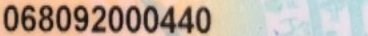

068092000440


In [8]:
image_crop = Image.open("/home/jovyan/work/output_img/_1.png")
image_crop.show()
text = vietocr_model.predict(image_crop)
print(text)